In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter

In [2]:
cpu_data = pd.read_csv('sysinfo.csv')

In [3]:
cpu_data['timestamp'] = pd.to_datetime(cpu_data['timestamp'])

In [4]:
loess_smoothed = lowess(cpu_data.temperature, cpu_data.timestamp, 0.05)

In [6]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1', 'fan_rpm']]

In [7]:
initial_state = kalman_data.iloc[0]
kalman_std = kalman_data.std()
observation_covariance = np.diag([kalman_std[0],kalman_std[1],kalman_std[2],kalman_std[3]]) ** 2 
transition_covariance = np.diag([3, 3, 3, 3]) ** 2 
transition = [[0.94,0.5,0.2,-0.001], [0.1,0.4,2.1,0], [0,0,0.94,0], [0,0,0,1]] 

In [13]:
kf = KalmanFilter(initial_state_mean=initial_state,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition)
kalman_smoothed, _ = kf.smooth(kalman_data)

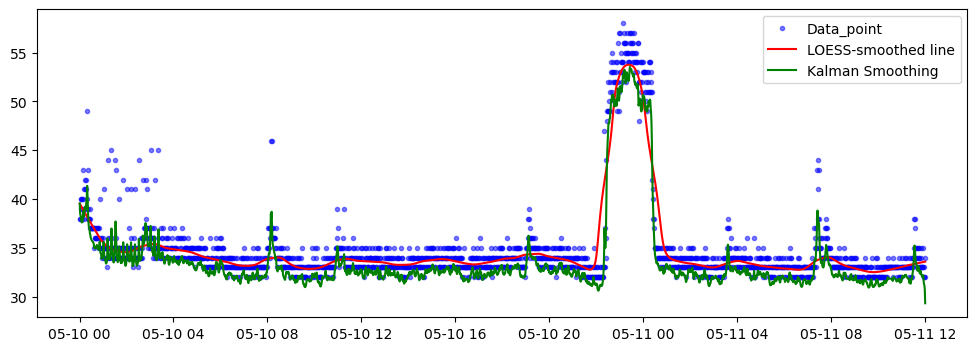

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.',alpha=0.5,label="Data_point")
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-',label="LOESS-smoothed line")
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-',label = "Kalman Smoothing")
plt.legend()
plt.show()
plt.savefig('cpu.svg')